
# **Initiate and Configure Spark**

---


In [ ]:
########## ONLY in Colab ##########
!pip3 install pyspark
########## ONLY in Colab ##########

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 281.4 MB 38 kB/s 
     |████████████████████████████████| 199 kB 55.8 MB/s 
  Created wheel for pyspark: filename=pyspark-3.3.1-py2.py3-none-any.whl size=281845512 sha256=30000192a08dc014c21e2778762a0481633059cc18837e7e912aa8f7444557f2
  Stored in directory: /root/.cache/pip/wheels/43/dc/11/ec201cd671da62fa9c5cc77078235e40722170ceba231d7598
Successfully built pyspark


In [ ]:
# linking with SparkSession
from pyspark.sql import SparkSession
spark = SparkSession.builder.master("local[*]").appName('14').getOrCreate()

# Note: If you want to work with RDD, you should use: "from pyspark import SparkContext, SparkConf"


# **Load Data**

---


In [ ]:
########## ONLY in Colab ##########
# mount your Google Drive
from google.colab import drive
drive.mount('/content/drive')
########## ONLY in Colab ##########

Mounted at /content/drive


In [ ]:
# Load Data from Colab:

########## ONLY in Colab ##########
IDS_dataframe = spark.read.option("header", "true").csv("/content/drive/MyDrive/Colab Notebooks/IDS2018/*.csv")
########## ONLY in Colab ##########

In [ ]:
df = IDS_dataframe
for cols in df.columns:

  df=df.withColumn(cols,col(cols).cast("double"))

In [ ]:
# Print DF to make sure it is working
IDS_dataframe.show()

+--------+--------+-------------------+-------------+------------+------------+---------------+---------------+---------------+---------------+----------------+---------------+---------------+---------------+----------------+---------------+---------------+-------------+----------------+----------------+------------+------------+-----------+----------------+----------------+-----------+-----------+-----------+----------------+----------------+-----------+-----------+-------------+-------------+-------------+-------------+--------------+--------------+-------------+------------+-----------+-----------+--------------+--------------+----------------+------------+------------+------------+------------+------------+------------+--------------+------------+-------------+--------------+----------------+----------------+--------------+--------------+----------------+--------------+--------------+----------------+----------------+----------------+----------------+----------------+--------------

In [ ]:
# The total number of attacks per label
IDS_dataframe.select('Label').groupBy('Label').count().orderBy('count', ascending=False).show()

+--------------------+-------+
|               Label|  count|
+--------------------+-------+
|              Benign|1719644|
|    DDOS attack-HOIC| 397431|
|                 Bot| 286191|
|    DoS attacks-Hulk| 205868|
|      FTP-BruteForce| 193360|
|      SSH-Bruteforce| 187589|
|DoS attacks-SlowH...|  91434|
|DoS attacks-Golde...|  41508|
|DoS attacks-Slowl...|  10990|
|DDOS attack-LOIC-UDP|   1730|
|    Brute Force -Web|    611|
|    Brute Force -XSS|    230|
|       SQL Injection|     87|
|                null|      7|
+--------------------+-------+




# **Task 1: Spark SQL [30 marks]**

---



In [ ]:
from pyspark import sql
IDS_dataframe.createOrReplaceTempView('IDS_TempView')


In [ ]:
sqlDF = spark.sql("SELECT Label,count(*) as Attacks From IDS_TempView GROUP BY Label")
sqlDF.show()


+--------------------+--------+
|               Label|count(1)|
+--------------------+--------+
|      SSH-Bruteforce|  187589|
|              Benign| 1719644|
|      FTP-BruteForce|  193360|
|DoS attacks-Slowl...|   10990|
|DoS attacks-Golde...|   41508|
|DoS attacks-SlowH...|   91434|
|    DoS attacks-Hulk|  205868|
|DDOS attack-LOIC-UDP|    1730|
|    DDOS attack-HOIC|  397431|
|       SQL Injection|      87|
|    Brute Force -XSS|     230|
|    Brute Force -Web|     611|
|                 Bot|  286191|
|                null|       7|
+--------------------+--------+



+--------------------+------------------------+------------------------+---------------------+
|     Attack category|Minimum length of a flow|Maximum length of a flow|Mean length of a flow|
+--------------------+------------------------+------------------------+---------------------+
|      SSH-Bruteforce|                     0.0|             9.1566368E7|    9650457.894353768|
|              Benign|             1.9403008E7|            8.08402031E8| 1.5898254896535227E8|
|      FTP-BruteForce|                     0.0|                     0.0|                  0.0|
|DoS attacks-Slowl...|                     0.0|               1257658.0|    690423.6882073468|
|DoS attacks-Golde...|                     0.0|             2.4011823E7|    4068859.112092522|
|DoS attacks-SlowH...|                     0.0|                     0.0|                  0.0|
|    DoS attacks-Hulk|                     0.0|              1.716473E7|   2807831.4868928264|
|DDOS attack-LOIC-UDP|                 55360.0|   

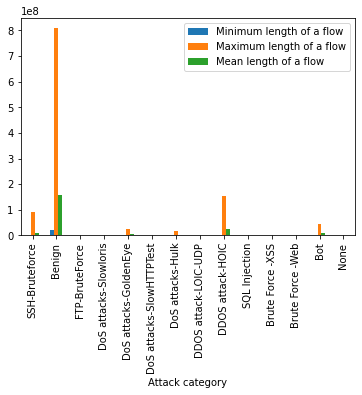

In [ ]:
# Student 1: Arya Murali and 2261667
# Query 1 [Briefly explain]:This query is to display sum of minimum length ,maximum length ,average length of the flow on each Attacks
q1 = spark.sql("SELECT `Label` AS `Attack category`,SUM(`pkt len min`) AS `Minimum length of a flow` ,\
SUM(`pkt len max`) AS `Maximum length of a flow`,SUM(`pkt len mean`) AS `Mean length of a flow` \
From IDS_TempView GROUP BY `Attack category`")
q1.show()
q1=q1.toPandas()
q1.set_index('Attack category').plot(kind='bar')


+-------------------+--------------------+
|avg packet len diff|               label|
+-------------------+--------------------+
| 488.12226729712296|      SSH-Bruteforce|
| 458.81532631172496|              Benign|
|                0.0|      FTP-BruteForce|
| 114.43657870791628|DoS attacks-Slowl...|
|  578.4866290835502|DoS attacks-Golde...|
|                0.0|DoS attacks-SlowH...|
|  83.37735830726486|    DoS attacks-Hulk|
|                0.0|DDOS attack-LOIC-UDP|
| 384.79047935364883|    DDOS attack-HOIC|
|  951.3103448275862|       SQL Injection|
|  944.9347826086956|    Brute Force -XSS|
| 395.02945990180035|    Brute Force -Web|
| 162.42432850788458|                 Bot|
+-------------------+--------------------+



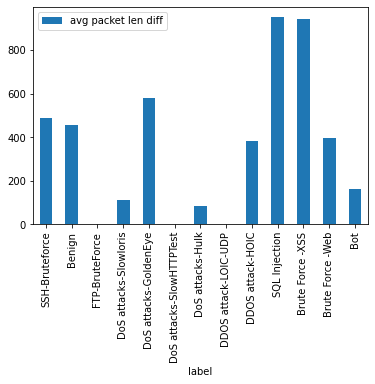

In [ ]:
# Student 1: Arya Murali and 2261667
# Query 2 [Briefly explain]: This query is to display the avarage difference between packets length
q2=spark.sql("select avg(`packet length difference`) `avg packet len diff`,label from (select (`Pkt Len Max`-`Pkt Len Min`) `packet length difference`,label from IDS_TempView where label is not null) group by label")
q2.show()
q2=q2.toPandas()
q2.set_index('label').plot(kind='bar')

+--------+-------------+
|Protocol|request_count|
+--------+-------------+
|       0|        26736|
|      17|       436000|
|       6|      2673944|
+--------+-------------+



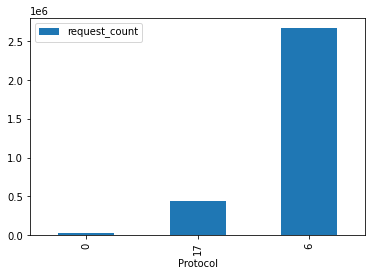

In [ ]:
# Student 2:Sreeraj jayarajan  and 2278601
# Query 1 [Briefly explain]:This query is to display the highest number of request count on protocols

sqlDF=spark.sql('''select Protocol,count(*) as request_count from (select * from IDS_TempView where Protocol is  null) group by Protocol''')
sqlDF.show()
sqlDF=sqlDF.orderBy('request_count').toPandas()
sqlDF.set_index('Protocol').plot(kind='bar')
#after checking the protocol counts the protocol 6 seems to be of larger presence in the records


+--------+--------------------+------------+
|Protocol|               label|record_count|
+--------+--------------------+------------+
|       0|              Benign|       26457|
|       6|      SSH-Bruteforce|      187589|
|       6|              Benign|     1259052|
|      17|              Benign|      434135|
|       6|      FTP-BruteForce|      193360|
|       6|DoS attacks-Golde...|       41508|
|       6|DoS attacks-Slowl...|       10990|
|       6|    DoS attacks-Hulk|      205868|
|       6|DoS attacks-SlowH...|       91434|
|      17|DDOS attack-LOIC-UDP|        1730|
|       6|    DDOS attack-HOIC|      397431|
|       6|    Brute Force -Web|         462|
|       6|    Brute Force -XSS|         225|
|       6|       SQL Injection|          87|
|      17|    Brute Force -XSS|           5|
|       0|    Brute Force -Web|          21|
|      17|    Brute Force -Web|         128|
|       6|                 Bot|      285933|
|       0|                 Bot|         258|
+--------+

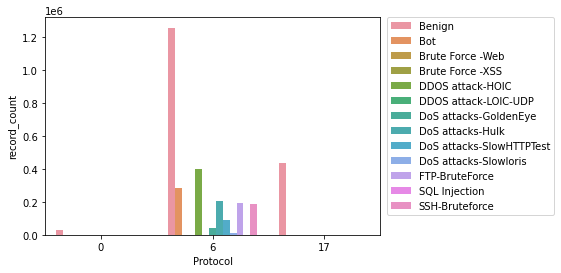

In [ ]:
# Student 2:Sreeraj jayarajan  and 2278601
# Query 2 [Briefly explain]: This query is to display the count of benign and non benign attacks in each protocol

import seaborn as sns
import matplotlib.pyplot as plt

sqlDF=spark.sql("""select Protocol,label,count(*) record_count from (select * from IDS_TempView where label is not null) group by Protocol,label""")
sqlDF.show()
sqlDF=sqlDF.orderBy('label').toPandas()
p = sns.barplot(data=sqlDF, x='Protocol',y='record_count', hue='label')
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)


+--------+--------------------+------+
|Dst Port|               label| count|
+--------+--------------------+------+
|      22|      SSH-Bruteforce|187559|
|      21|      FTP-BruteForce|193360|
|      80|DoS attacks-Golde...| 41508|
|      80|DoS attacks-Slowl...| 10990|
|      21|DoS attacks-SlowH...| 91434|
|      80|    DoS attacks-Hulk|205868|
|      80|DDOS attack-LOIC-UDP|  1730|
|      80|    DDOS attack-HOIC|397431|
|      80|    Brute Force -Web|   460|
|      80|    Brute Force -XSS|   225|
|      80|       SQL Injection|    87|
|     500|    Brute Force -Web|   126|
|    8080|                 Bot|281634|
|       0|                 Bot|   258|
+--------+--------------------+------+



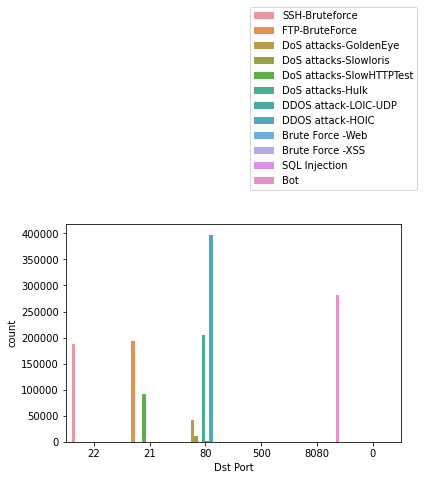

In [ ]:
# Student 3 :Pooja Prakash and 2304970
# Query 1 [Briefly explain]:This query is to display the count of Destination port greater than 30 for differnt attacks other than benign
query1=spark.sql("select `Dst Port`,label,count(*) as count from (select *  from IDS_TempView where label!='Benign') group by `Dst Port`,label having count >30")
query1.show()
query1=query1.toPandas()
plot = sns.barplot(data=query1, x='Dst Port',y='count', hue='label')
plt.legend(bbox_to_anchor=(1.05, 2), loc='upper right', borderaxespad=0)



+--------------------+--------------------+
|               label|  avg(Flow Duration)|
+--------------------+--------------------+
|      SSH-Bruteforce|  183349.68250803617|
|      FTP-BruteForce|  3.8031961108812578|
|DoS attacks-Slowl...| 7.198033626979072E7|
|DoS attacks-Golde...|1.1233440509347595E7|
|DoS attacks-SlowH...|   4.910744362053503|
|    DoS attacks-Hulk|   190032.5389472866|
|DDOS attack-LOIC-UDP|1.1601816929884394E8|
|    DDOS attack-HOIC|  12046.983129146945|
|       SQL Injection|  3315726.9310344825|
|    Brute Force -XSS|2.8662697826086957E7|
|    Brute Force -Web|  3.54413044680851E7|
|                 Bot|   75298.90860649008|
+--------------------+--------------------+



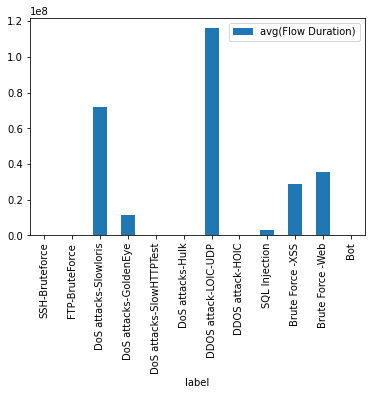

In [ ]:
# Student 3 :Pooja Prakash and 2304970
# Query 2 [Briefly explain]:This query is to display the average flow duration of each attack other than benign
from pyspark.sql.functions import avg
query1=spark.sql("select label,avg(`Flow Duration`) from (select label,`flow duration` from IDS_TempView where label!='Benign') group by label")
query1.show()
query1.toPandas().set_index('label').plot(kind='bar')


+-------------------+--------------------+
|avg(Fwd Header Len)|               label|
+-------------------+--------------------+
|  379.1591191381158|      SSH-Bruteforce|
| 132.52334087753047|              Benign|
|               40.0|      FTP-BruteForce|
| 256.24021838034577|DoS attacks-Slowl...|
| 124.78182519032475|DoS attacks-Golde...|
|               40.0|DoS attacks-SlowH...|
|  72.26385839469951|    DoS attacks-Hulk|
|  938811.4312138729|DDOS attack-LOIC-UDP|
|  53.16929982814627|    DDOS attack-HOIC|
|  90.29885057471265|       SQL Injection|
| 1944.9913043478261|    Brute Force -XSS|
|  694.1996726677578|    Brute Force -Web|
|  56.72667554185841|                 Bot|
|               47.0|                null|
+-------------------+--------------------+



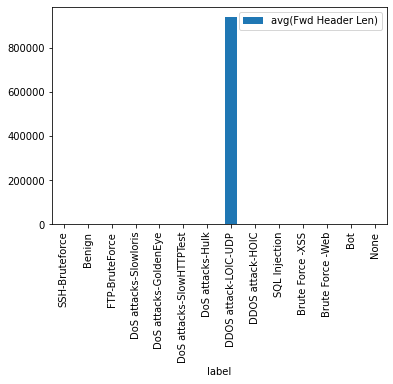

In [ ]:
# Student 4 syam omanakuttan and 2292100
# Query 1 [Briefly explain]:This query is to display average fwd header len of each attacks

query1=spark.sql("select avg(`Fwd Header Len`),label from IDS_TempView group by label")
query1.show()
query1.toPandas().set_index('label').plot(kind='bar')

+-----------------------+--------+
|average tot fwd packets|Protocol|
+-----------------------+--------+
|       9.61796828246559|       0|
|     467.10456240624956|      17|
|       5.50555266967571|       6|
+-----------------------+--------+



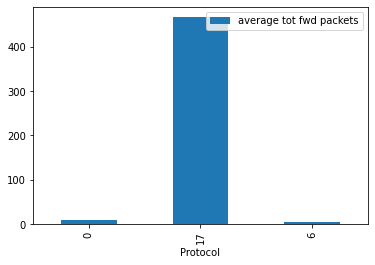

In [ ]:
# Student 4: syam omanakuttan and 2292100
# Query 2 [Briefly explain]: this query is to display average tot fwd packets for each protocol
Query2=spark.sql('select  avg(`Tot Fwd Pkts`) `average tot fwd packets`,Protocol from (select * from IDS_TempView where label is not null) group by Protocol')
Query2.show()
query2_data=Query2.toPandas()

query2_data.set_index('Protocol').plot(kind='bar')



# **Task 2 - Part1: PySpark [45 marks]**

---


In [ ]:

# Student 1: Arya Murali and 2261667
# Analytical method 1:Hypothesis testing
#Null:There is no difference between mean flow_duration between benign requests and other DDOS attacks
#alternate:there is difference in mean flow duration between benigh requests and other DDOS attacks
from pyspark.sql.functions import rand
from scipy import stats
from pyspark.sql.functions import col

benign = IDS_dataframe.select(col("Flow Duration")).filter(IDS_dataframe.Label == 'Benign')
benign = benign.select('Flow Duration').orderBy(rand()).limit(1000).toPandas()
non_benign = IDS_dataframe.select(col("Flow Duration")).filter((IDS_dataframe.Label != 'Benign')&(IDS_dataframe.Label != 'null'))

non_benign = non_benign.select('Flow Duration').orderBy(rand()).limit(1000).toPandas()


stats.ttest_ind(benign['Flow Duration'].astype(int),non_benign['Flow Duration'].astype(int))
#pvalue is high so we accept the alternate hypothesis that DDOS flow duration is different from
#benign and non benign

Ttest_indResult(statistic=12.745567180738478, pvalue=7.873842166375115e-36)

In [ ]:
# Student 1: Arya Murali and 2261667
# Analytical method 2:Descriptive Method
#here describe function is used to display count,mean,stddev,min and max of the flow duration on each protocol
IDS_dataframe.describe('Flow Duration','Protocol').show()


+-------+--------------------+------------------+
|summary|       Flow Duration|          Protocol|
+-------+--------------------+------------------+
|  count|             3136679|           3136680|
|   mean|   6905697.307873072| 7.477863218434778|
| stddev|1.1219359422300453E9|3.8654668533037695|
|    min|       -110116000000|                 0|
|    max|            99999994|                 6|
+-------+--------------------+------------------+



In [ ]:
# Student 1: Arya Murali and 2261667
# Analytical method 3:Correlation
# since correlation only accepts integer data type so we are casting the data type to interger for totlen fwd pkts and totlen bwd pkts
from pyspark.sql.functions import col
IDS_dataframe=IDS_dataframe.withColumn('TotLen Fwd Pkts',col('TotLen Fwd Pkts').cast("int"))
IDS_dataframe=IDS_dataframe.withColumn('TotLen Bwd Pkts',col('TotLen Bwd Pkts').cast("int"))
IDS_dataframe.stat.corr('TotLen Fwd Pkts','TotLen Bwd Pkts')


0.0009817765698315727

In [ ]:
# Student 2:Sreeraj jayarajan  and 2278601
# Analytical method 1:Hypothesis testing

from pyspark.sql.functions import rand
from scipy.stats import ttest_ind
data1 = IDS_dataframe.select(col("Fwd Header Len")).filter(IDS_dataframe.Protocol == '6').select('Fwd Header Len').limit(1000).toPandas()
data2 = IDS_dataframe.select(col("Fwd Header Len")).filter(IDS_dataframe.Protocol == '17').select('Fwd Header Len').limit(1000).toPandas()
data1['Fwd Header Len']=data1['Fwd Header Len'].astype(int)
data2['Fwd Header Len']=data2['Fwd Header Len'].astype(int)

ttest_ind(data1['Fwd Header Len'],data2['Fwd Header Len'])


Ttest_indResult(statistic=17.026127529293255, pvalue=8.2808546868631e-61)

In [ ]:
# Student 2:Sreeraj jayarajan  and 2278601
# Analytical method 2:correlation
from pyspark.sql.functions import col
IDS_dataframe=IDS_dataframe.withColumn('Pkt Len Min',col('Pkt Len Min').cast("int"))
IDS_dataframe=IDS_dataframe.withColumn('Pkt Len Max',col('Pkt Len Max').cast("int"))
IDS_dataframe.stat.corr('Pkt Len Min','Pkt Len Max')



-0.12989570917724452

In [ ]:
# Student 2:Sreeraj jayarajan  and 2278601
# Analytical method 3:

from pyspark.sql.functions import countDistinct
IDS_dataframe.agg(*(countDistinct(col(c)).alias(c) for c in IDS_dataframe.columns)).show()

+--------+--------+---------+-------------+------------+------------+---------------+---------------+---------------+---------------+----------------+---------------+---------------+---------------+----------------+---------------+-----------+-----------+-------------+------------+------------+------------+-----------+------------+-----------+-----------+-----------+-----------+------------+-----------+-----------+-----------+-------------+-------------+-------------+-------------+--------------+--------------+----------+----------+-----------+-----------+------------+-----------+-----------+------------+------------+------------+------------+------------+------------+--------------+------------+-------------+------------+----------------+----------------+--------------+--------------+----------------+--------------+--------------+----------------+----------------+----------------+----------------+----------------+-----------------+-----------------+-----------------+----------------+-

In [ ]:
# Student 3 :Pooja Prakash and 2304970
# Analytical method 1:Hypothesis testing between subflow fwd bytes where where ack flag 0 or 1

from pyspark.sql.functions import rand
from scipy.stats import ttest_ind


d1=spark.sql("select `Subflow Fwd Byts` from IDS_TempView where `ACK Flag Cnt`='0'").select('Subflow Fwd Byts').orderBy(rand()).limit(1000).toPandas()
d2=spark.sql("select `Subflow Fwd Byts` from IDS_TempView where `ACK Flag Cnt`='1'").select('Subflow Fwd Byts').orderBy(rand()).limit(1000).toPandas()
d1['Subflow Fwd Byts']=d1['Subflow Fwd Byts'].astype(int).values
d2['Subflow Fwd Byts']=d2['Subflow Fwd Byts'].astype(int).values

ttest_ind(d1['Subflow Fwd Byts'],d2['Subflow Fwd Byts'])



Ttest_indResult(statistic=1.093192641236413, pvalue=0.27444101241791014)

In [ ]:
# Student 3 :Pooja Prakash and 2304970
# Analytical method 2:correlation between fwd and bwd seg
from pyspark.sql.functions import col
IDS_data=IDS_dataframe.withColumn('Fwd Seg Size Avg',col('Fwd Seg Size Avg').cast("int"))
IDS_data=IDS_data.withColumn('Bwd Seg Size Avg',col('Bwd Seg Size Avg').cast("int"))
IDS_data.stat.corr('Fwd Seg Size Avg','Bwd Seg Size Avg')


0.40681812640860127

In [ ]:
# Student 3 :Pooja Prakash and 2304970
# Analytical method 3:this method is used to display the count of null and nan values on each feature
from pyspark.sql.functions import isnan, when, count, col
IDS_dataframe.select([count(when(isnan(cols) | col(cols).isNull(), cols)).alias(cols) for cols in IDS_dataframe.columns]).show()


+--------+--------+---------+-------------+------------+------------+---------------+---------------+---------------+---------------+----------------+---------------+---------------+---------------+----------------+---------------+-----------+-----------+-------------+------------+------------+------------+-----------+------------+-----------+-----------+-----------+-----------+------------+-----------+-----------+-----------+-------------+-------------+-------------+-------------+--------------+--------------+----------+----------+-----------+-----------+------------+-----------+-----------+------------+------------+------------+------------+------------+------------+--------------+------------+-------------+------------+----------------+----------------+--------------+--------------+----------------+--------------+--------------+----------------+----------------+----------------+----------------+----------------+-----------------+-----------------+-----------------+----------------+-

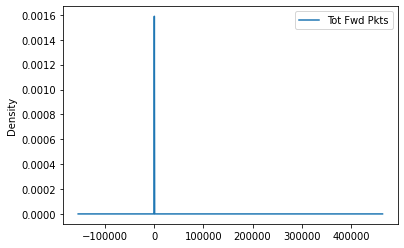

In [ ]:
# Student 4 syam omanakuttan and 2292100
# Analytical method 1: descriptive method to find total fwd packets and its maximum flow duration
query4=spark.sql("select `Tot Fwd Pkts` from IDS_TempView")
query4=query4.withColumn("Tot Fwd Pkts",col("Tot Fwd Pkts").cast("int"))
query4.toPandas().plot(kind='kde')


In [ ]:
# Student 4: syam omanakuttan and 2292100
# Analytical method 2:This method is used to find the Kurtosis between Tot Fwd pkts
from pyspark.sql import functions as f
IDS_data.select(f.kurtosis(IDS_dataframe['Tot fwd pkts']),f.kurtosis(IDS_data['Tot bwd pkts'])).show()

+----------------------+----------------------+
|kurtosis(Tot fwd pkts)|kurtosis(Tot bwd pkts)|
+----------------------+----------------------+
|    2241.5289027732556|    150872.07817724824|
+----------------------+----------------------+



In [ ]:
# Student 4: syam omanakuttan and 2292100
# Analytical method 3:#Null hypothesis: label Group's Fwd Header Len means are equal
#Alternative hypothesis: label groups Fwd Header Len means are differnt
import scipy.stats as stats
import pandas as pd
query_4=spark.sql("select `Fwd Header Len`,Label from IDS_TempView ")
query4_df=query_4.toPandas()
CategoryGroupLists=query4_df.groupby('Label')['Fwd Header Len'].apply(list)

needed_data=pd.DataFrame(CategoryGroupLists).T.apply(lambda x:x['Fwd Header Len'][:87])
fvalue, pvalue = stats.f_oneway(needed_data['Benign'],needed_data['Bot'],
                                needed_data['Brute Force -Web'],
                                needed_data['Brute Force -XSS'],
                                needed_data['DDOS attack-HOIC'],
                                needed_data['DDOS attack-LOIC-UDP'],
                                needed_data['DoS attacks-GoldenEye'],
                                needed_data['DoS attacks-Hulk'],
                                needed_data['DoS attacks-SlowHTTPTest'],
                                needed_data['DoS attacks-Slowloris'],
                                needed_data['FTP-BruteForce'],
                                needed_data['SQL Injection'],
                                needed_data['SSH-Bruteforce'])
print(fvalue, pvalue)
#p value is way less than our threshold 0.05 hence we reject null hypothesis and accept alternate hypothesis

897.9828429331369 0.0



# **Task 2 - Part2: PySpark [15 marks]**

---


In [ ]:
from pyspark.sql.functions import col
from pyspark.sql.types import DoubleType
columns=['Dst Port','Protocol','Flow Duration','Tot Fwd Pkts','Tot Bwd Pkts','TotLen Fwd Pkts','TotLen Bwd Pkts','Fwd Pkt Len Max','Fwd Pkt Len Min','Fwd Pkt Len Mean',
 'Fwd Pkt Len Std','Bwd Pkt Len Max','Bwd Pkt Len Min','Bwd Pkt Len Mean','Bwd Pkt Len Std']




In [ ]:
# Student 1: Arya Murali and 2261667
# Machine Learning Technique:Clustering
# What to achieve: Feature Extraction

from pyspark.ml.feature import VectorAssembler
from pyspark.sql.functions import col
from pyspark.sql.types import IntegerType
from pyspark.ml.feature import StringIndexer,VectorAssembler
from pyspark.ml.evaluation import MulticlassClassificationEvaluator
df.na.drop()
cols=['Tot Fwd Pkts','Tot Bwd Pkts','TotLen Fwd Pkts','TotLen Bwd Pkts','Fwd Pkt Len Max','Fwd Pkt Len Min','Fwd Pkt Len Mean',
 'Fwd Pkt Len Std','Bwd Pkt Len Max','Bwd Pkt Len Min','Bwd Pkt Len Mean','Bwd Pkt Len Std']

asmblr=VectorAssembler(inputCols=cols, outputCol="features")
featDf = asmblr.transform(df)
featDf.show(5)
trainingData, testData = featDf.randomSplit([0.8, 0.2], seed = 5043)

+--------+--------+---------+-------------+------------+------------+---------------+---------------+---------------+---------------+----------------+---------------+---------------+---------------+----------------+---------------+--------------+------------+----------------+----------------+------------+------------+------------+----------------+----------------+-----------+-----------+-----------+----------------+----------------+-----------+-----------+-------------+-------------+-------------+-------------+--------------+--------------+------------+------------+-----------+-----------+--------------+--------------+----------------+------------+------------+------------+------------+------------+------------+--------------+------------+-------------+------------+----------------+----------------+--------------+--------------+----------------+--------------+--------------+----------------+----------------+----------------+----------------+----------------+-----------------+----------

In [ ]:
# Student 2:Sreeraj jayarajan  and 2278601
# Machine Learning Technique:Decision Tree Classifier
# What to achieve:

import pandas as pd
import seaborn as sns
from pyspark.ml import Pipeline
from pyspark.ml.classification import DecisionTreeClassifier
from pyspark.ml.feature import StringIndexer,VectorAssembler
from pyspark.ml.evaluation import MulticlassClassificationEvaluator
IDS_dataframe1=df.na.drop()
IDS_dataframe1=IDS_dataframe1.drop(*cols)
#Dropping Null values
dataframe=df.na.drop()
needed_columns=['Dst Port','Protocol','Flow Duration','Tot Fwd Pkts','Tot Bwd Pkts','TotLen Fwd Pkts','TotLen Bwd Pkts','Fwd Pkt Len Max','Fwd Pkt Len Min','Fwd Pkt Len Mean',
 'Fwd Pkt Len Std','Bwd Pkt Len Max','Bwd Pkt Len Min','Bwd Pkt Len Mean']
labelIndexer = StringIndexer(inputCol="Label", outputCol="Label_indexed").fit(dataframe)
vectorAssembler = VectorAssembler(inputCols = needed_columns, outputCol = 'features',handleInvalid='skip')
dataframe.show(3)
train, test = dataframe.randomSplit([0.75, 0.25])
decision_tree = DecisionTreeClassifier(labelCol="Label_indexed", featuresCol="features")
pipeline = Pipeline(stages=[labelIndexer, vectorAssembler, decision_tree])
model = pipeline.fit(train)
# Applying thePredictions and Evaluating the Results
predictions = model.transform(test)
predictions.select("prediction", "Label_indexed", "features").show(5)



In [ ]:
# Student 3 :Pooja Prakash and 2304970
# Machine Learning Technique:Naive Bayes
# What to achieve:
from pyspark.ml.classification import NaiveBayes
from pyspark.ml.evaluation import MulticlassClassificationEvaluator
from pyspark.ml.feature import VectorAssembler,StringIndexer
from sklearn.metrics import confusion_matrix
import pyspark.sql.functions as f
data=df.sample(withReplacement=False, fraction=0.01, seed=35)#
indexer = StringIndexer(inputCol="Label", outputCol="label")
indexer_model= indexer.fit(data)
data=indexer_model.transform(data)
features=['Dst Port','Protocol','Tot Fwd Pkts','Tot Bwd Pkts','TotLen Fwd Pkts','TotLen Bwd Pkts']
all_features=features.append('label')
# combine the numerical feature columns into a single vector column
vectorAssembler = VectorAssembler(inputCols=features, outputCol="features")
data = vectorAssembler.transform(data)
data=data.select(['features','label'])
# split the data into train and test sets
train, test = data.randomSplit([0.8, 0.2])

# train the SVM model

nb = NaiveBayes(smoothing=1.0, modelType="multinomial")
nb = nb.fit(train)

pred = nb.transform(test)
pred.show(3)

evaluator=MulticlassClassificationEvaluator(predictionCol="prediction")
acc = evaluator.evaluate(pred)
print("Prediction Accuracy: ", acc)

y_pred=pred.select("prediction").collect()
y_orig=pred.select("label").collect()

cm = confusion_matrix(y_orig, y_pred)
print("Confusion Matrix:")
print(cm)



In [ ]:
# # Student 4: syam omanakuttan and 2292100
# Machine Learning Technique: Clustering
# What to achieve:
from pyspark.ml.clustering import KMeans
from pyspark.ml.evaluation import ClusteringEvaluator
count = [10,30,50,70,90]
for i in count:
  km = KMeans().setK(i).setSeed(1).setFeaturesCol("features").setPredictionCol("prediction")
  kmModel = km.fit(trainingData)
  for clusters in kmModel.clusterCenters():
    print(clusters)
  preDf = kmModel.transform(testData)
  preDf.show(10)
  eval = ClusteringEvaluator()
  silhouette = evaluator.evaluate(preDf)
  print("Silhouette  = " + str(silhouette))


# **Convert ipynb to HTML for Turnitin submission [10 marks]**

---



In [ ]:
# install nbconvert
#!pip3 install nbconvert


# convert ipynb to html
# file name: "Your_Group_ID_CN7031.ipynb

!jupyter nbconvert --to html 14_CN7031.ipynb

[NbConvertApp] Converting notebook 14_CN7031.ipynb to html
[NbConvertApp] Writing 607853 bytes to 14_CN7031.html
